# Car Sale Dataset EDA 02

In [5]:
import pandas as pd

# Load the dataset
file_path = 'car_sale.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the column names to inspect the dataset structure
print(df.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
Average selling price of cars for each dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.71

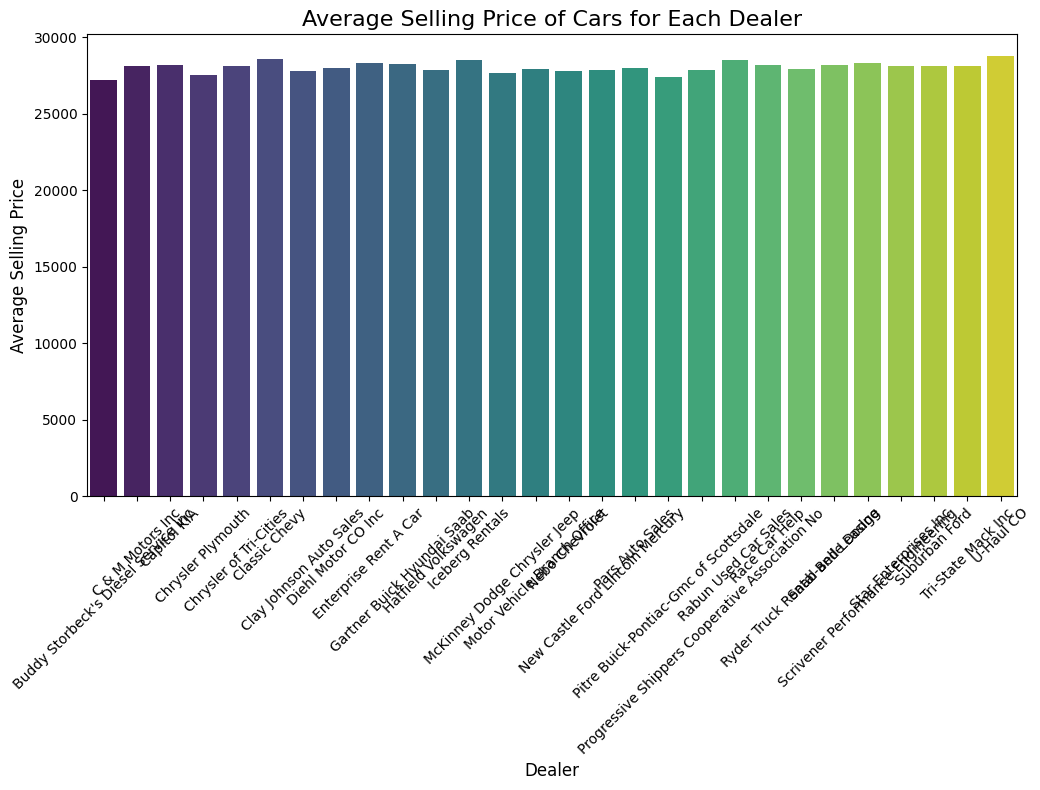

In [9]:
#Question_No.1: What is the average selling price of cars for each dealer, and how does it compare across different dealers.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Load the dataset
file_path = 'car_sale.csv' 
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Display the column names to ensure correctness
print(df.columns)

# Calculate the average selling price for each dealer
average_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()  # Replace 'Price ($)' with the correct column name if needed

# Output the average selling prices for each dealer
print("Average selling price of cars for each dealer:")
print(average_price_per_dealer)

# Visualize the average selling price across different dealers
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_per_dealer.index, y=average_price_per_dealer.values, palette='viridis')

# Adding title and labels
plt.title('Average Selling Price of Cars for Each Dealer', fontsize=16)
plt.xlabel('Dealer', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate dealer names if necessary
plt.show()

In [10]:
#Question_No.2:Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends.

#Answer:
import pandas as pd

# Load the dataset
file_path = 'car_sale.csv' 
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Calculate the standard deviation (variation) of the selling price for each car brand
price_variation = df.groupby('Company')['Price ($)'].std()  # Replace 'Price ($)' and 'company' with the correct column names if needed

# Find the car brand with the highest variation in prices
highest_variation_brand = price_variation.idxmax()
highest_variation_value = price_variation.max()

# Output the result
print(f"The car brand with the highest variation in prices is: {highest_variation_brand}")
print(f"With a standard deviation of: {highest_variation_value}")

The car brand with the highest variation in prices is: Lincoln
With a standard deviation of: 19658.050211265567


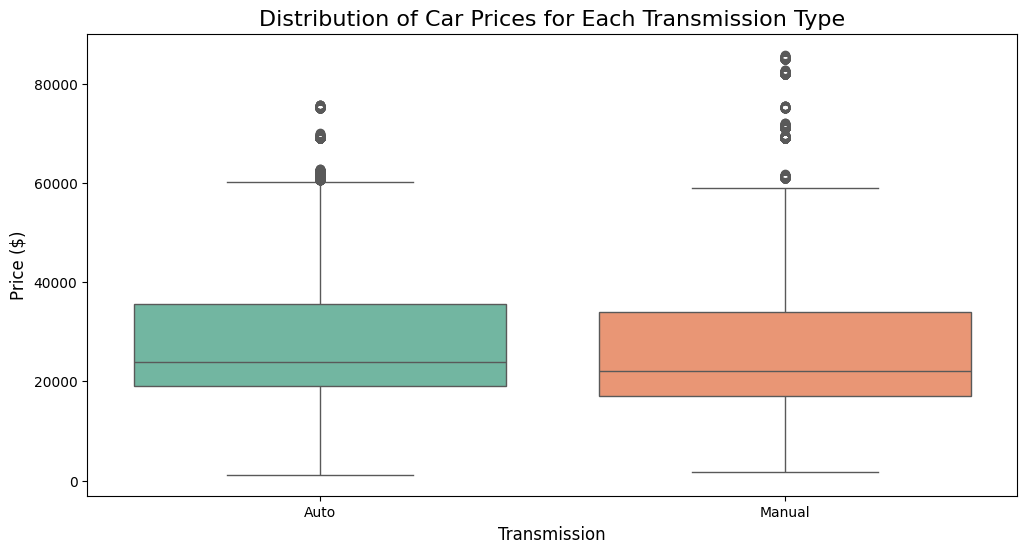

Interquartile Range (IQR) for Car Prices by Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [15]:
#Question_No.3:What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv' 
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values and handle them (optional)
# df = df.dropna(subset=['Price ($)', 'transmission'])  # You can drop rows with missing price or transmission

# Visualize the distribution of car prices for each transmission type using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')

# Adding title and labels
plt.title('Distribution of Car Prices for Each Transmission Type', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Show the plot
plt.show()

# Calculate the IQR (Interquartile Range) for each transmission type
IQR_by_transmission = df.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Output the IQR for each transmission type
print("Interquartile Range (IQR) for Car Prices by Transmission Type:")
print(IQR_by_transmission)

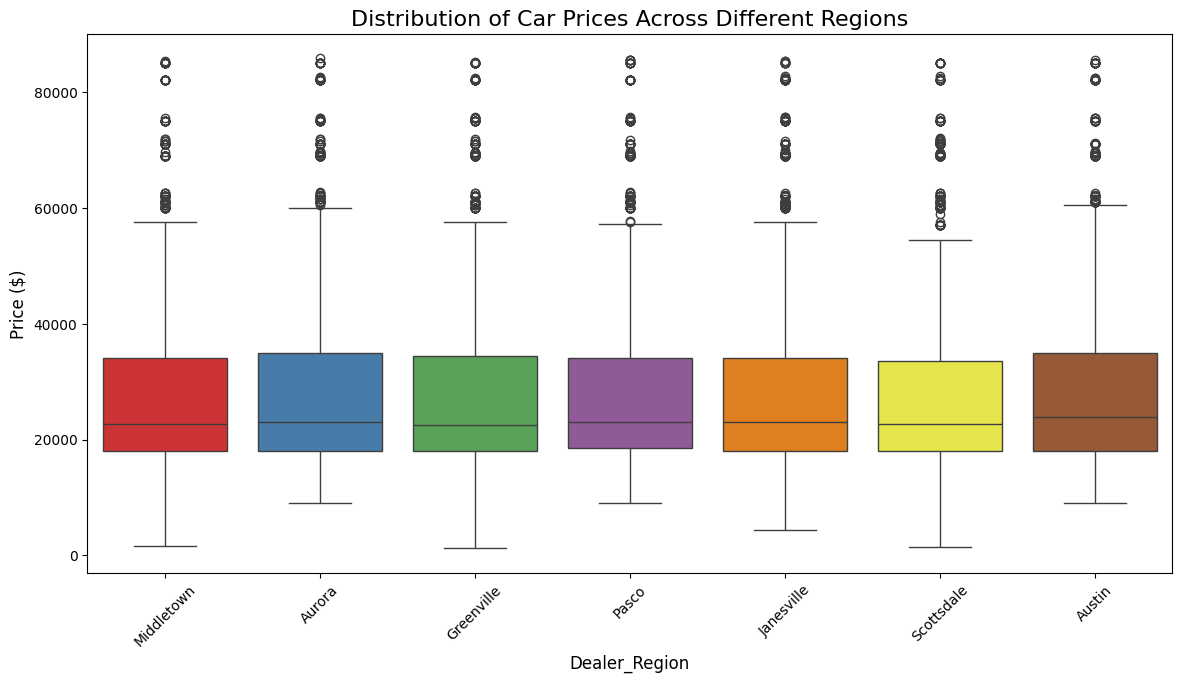

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [16]:
#Question_No.4:What is the distribution of car prices across different regions.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv' 
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in the 'Price ($)' and 'region' columns (optional)
# df = df.dropna(subset=['Price ($)', 'region'])

# Visualize the distribution of car prices across different regions using a boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set1')

# Adding title and labels
plt.title('Distribution of Car Prices Across Different Regions', fontsize=16)
plt.xlabel('Dealer_Region', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate region names if necessary
plt.show()

# Optionally, you can calculate and print summary statistics for each region
region_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print(region_stats)

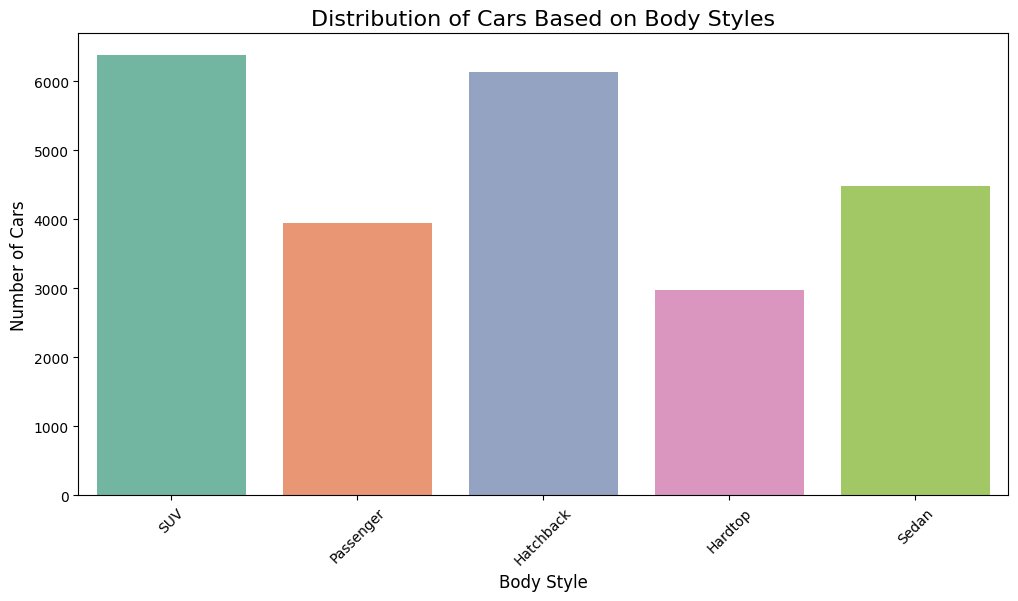

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [17]:
#Question_No.5: What is the distribution of cars based on body stylesE

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in the 'body_style' column (optional)
# df = df.dropna(subset=['body_style'])

# Visualize the distribution of cars based on body styles using a barplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Body Style', data=df, palette='Set2')

# Adding title and labels
plt.title('Distribution of Cars Based on Body Styles', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate body style names if necessary
plt.show()

# Optionally, you can calculate and print the count of cars for each body style
body_style_counts = df['Body Style'].value_counts()
print(body_style_counts)

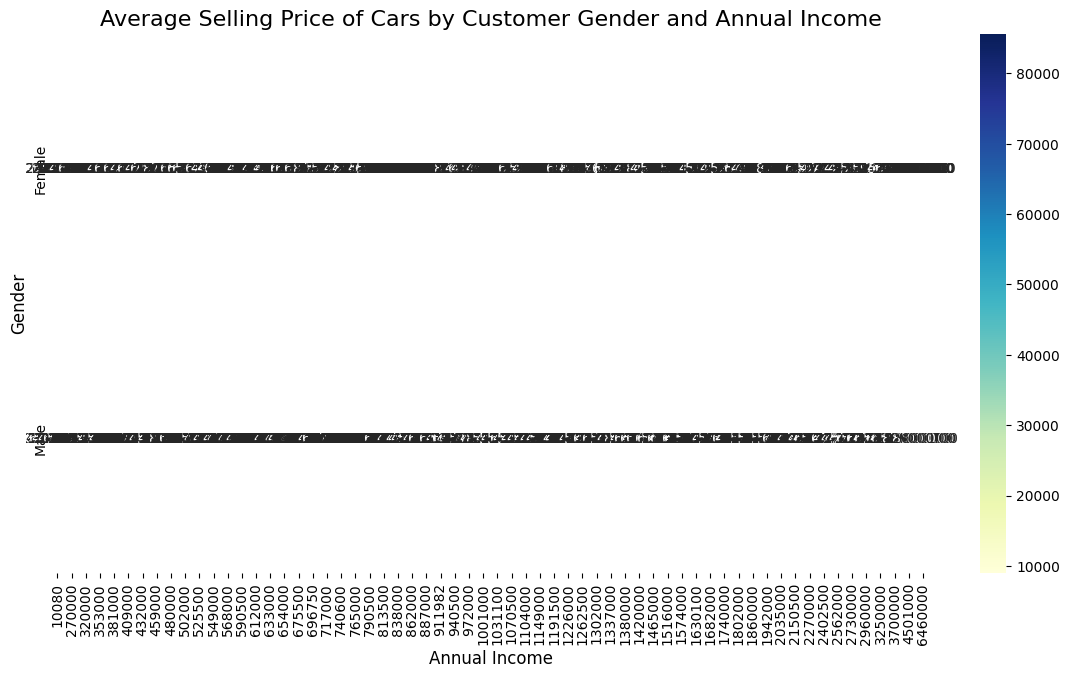

In [20]:
#Question_No.6: How does the average selling price of cars vary by customer gender and annual income.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in relevant columns
# df = df.dropna(subset=['Price ($)', 'gender', 'annual_income'])

# Group by customer gender and annual income, then calculate the average selling price
average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = average_price_by_gender_income.pivot(index='Gender', columns='Annual Income', values='Price ($)')

# Create a heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)

# Adding title and labels
plt.title('Average Selling Price of Cars by Customer Gender and Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Gender', fontsize=12)

# Show the plot
plt.show()

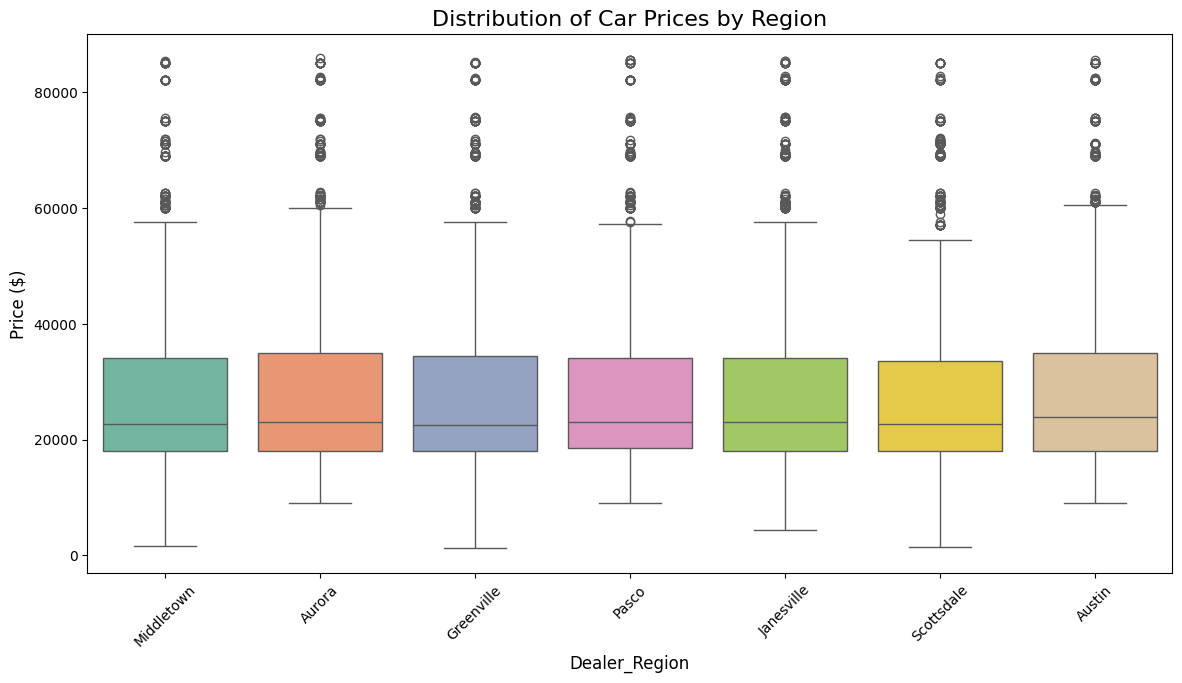

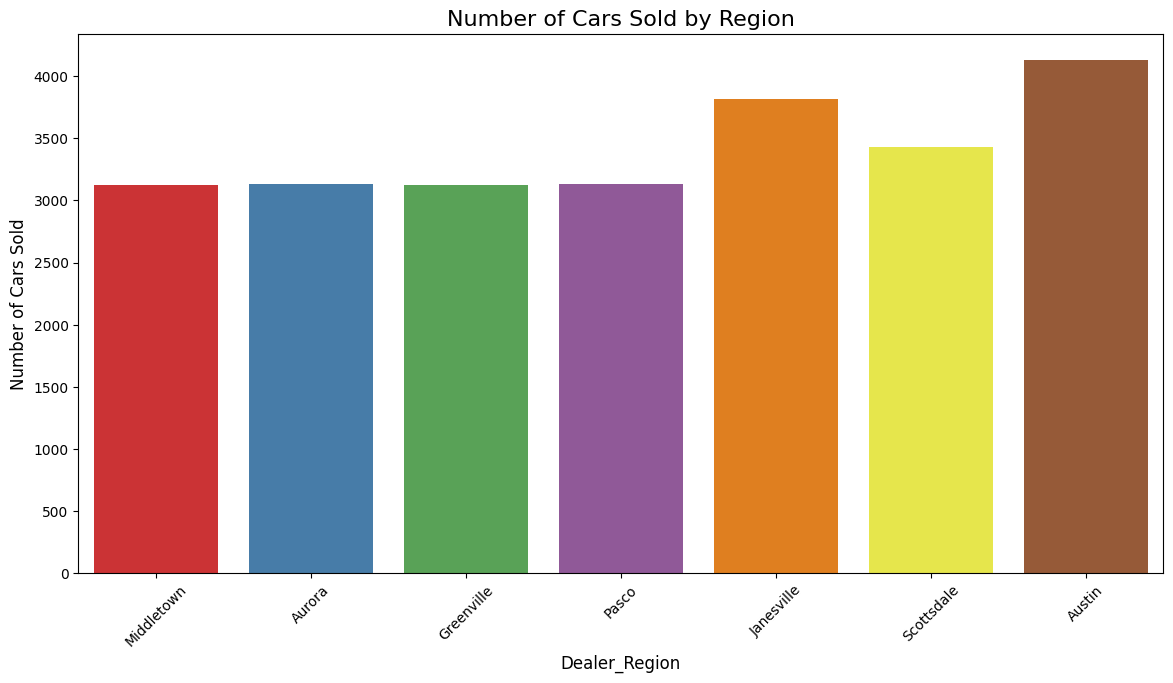

In [21]:
#Question_No.7: What is the distribution of car prices by region, and how does the number of cars sold vary by region.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in relevant columns
# df = df.dropna(subset=['Price ($)', 'region'])

# 1. Distribution of car prices by region using a boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set2')

# Adding title and labels for price distribution
plt.title('Distribution of Car Prices by Region', fontsize=16)
plt.xlabel('Dealer_Region', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate region names if necessary
plt.show()

# 2. Number of cars sold by region using a countplot
plt.figure(figsize=(14, 7))
sns.countplot(x='Dealer_Region', data=df, palette='Set1')

# Adding title and labels for car sales count
plt.title('Number of Cars Sold by Region', fontsize=16)
plt.xlabel('Dealer_Region', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(rotation=45)  # Rotate region names if necessary
plt.show()

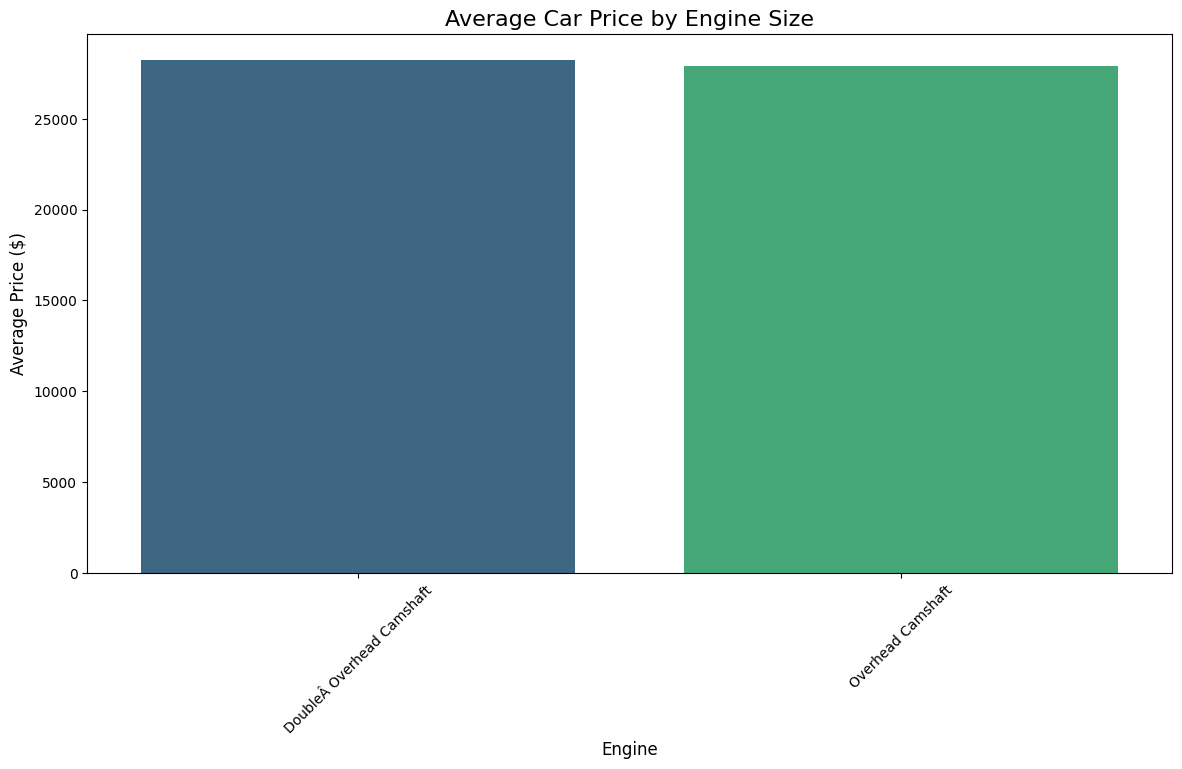

In [23]:
#Question_No.8: How does the average car price differ between cars with different engine sizes.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv' 
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in relevant columns
# df = df.dropna(subset=['Price ($)', 'engine_size'])

# Calculate the average price for each engine size
average_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean().reset_index()

# Sort the values by engine size for better visualization
average_price_by_engine_size = average_price_by_engine_size.sort_values(by='Engine')

# Visualize the relationship between engine size and average price using a barplot
plt.figure(figsize=(14, 7))
sns.barplot(x='Engine', y='Price ($)', data=average_price_by_engine_size, palette='viridis')

# Adding title and labels
plt.title('Average Car Price by Engine Size', fontsize=16)
plt.xlabel('Engine', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate engine size labels if necessary

# Show the plot
plt.show()

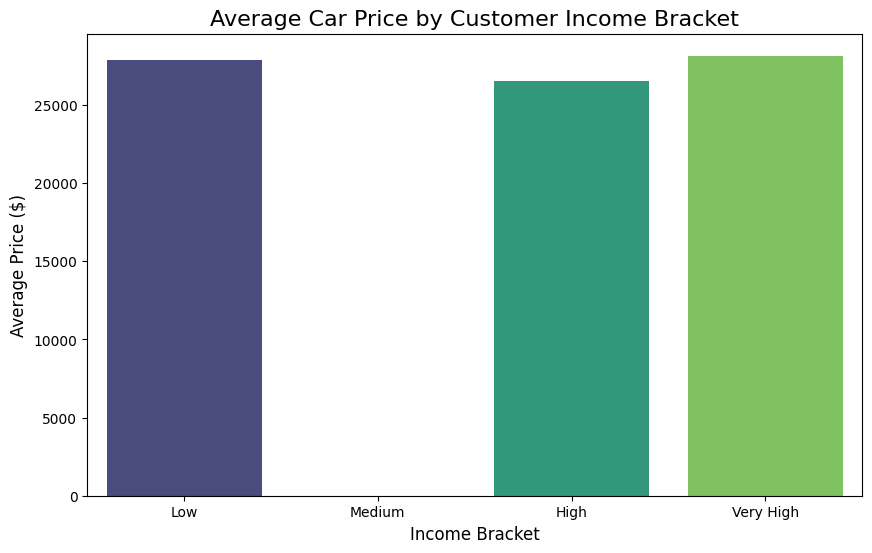

In [24]:
#Question_No.9: How do car prices vary based on the customer’s annual income bracket.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv' 
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values and drop rows with missing 'Price ($)' and 'annual_income' columns
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# 1. Define income brackets (you can adjust these ranges based on your data)
bins = [0, 30000, 70000, 150000, float('inf')]  # Low, Medium, High, Very High
labels = ['Low', 'Medium', 'High', 'Very High']
df['income_bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

# 2. Group by income bracket and calculate the average price
average_price_by_income_bracket = df.groupby('income_bracket')['Price ($)'].mean().reset_index()

# 3. Visualize the relationship using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='income_bracket', y='Price ($)', data=average_price_by_income_bracket, palette='viridis')

# Adding title and labels
plt.title('Average Car Price by Customer Income Bracket', fontsize=16)
plt.xlabel('Income Bracket', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Show the plot
plt.show()

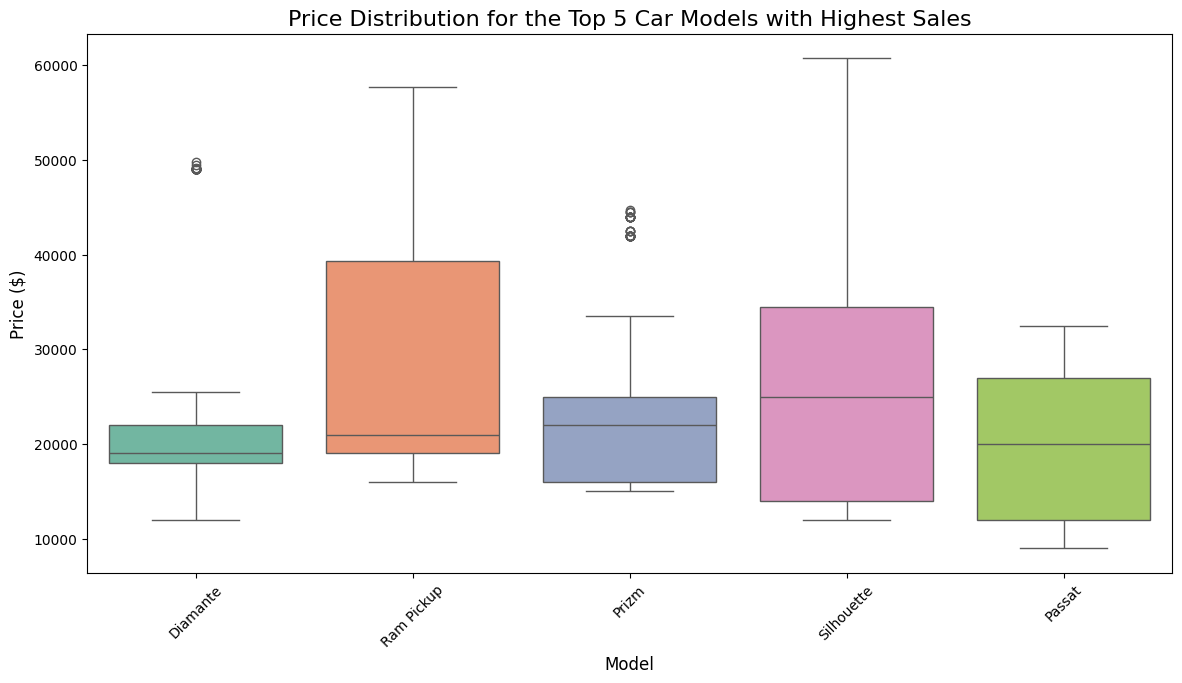

In [25]:
#Question_No.10: What are the top 5 car models with the highest number of sales, and how does their price distribution look.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv' 
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Model'])

# 1. Find the top 5 car models with the highest number of sales
top_5_models = df['Model'].value_counts().head(5).index

# 2. Filter the data to include only the top 5 car models
top_5_models_data = df[df['Model'].isin(top_5_models)]

# 3. Visualize the price distribution of the top 5 car models using a boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_data, palette='Set2')

# Adding title and labels
plt.title('Price Distribution for the Top 5 Car Models with Highest Sales', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate car model names if necessary

# Show the plot
plt.show()

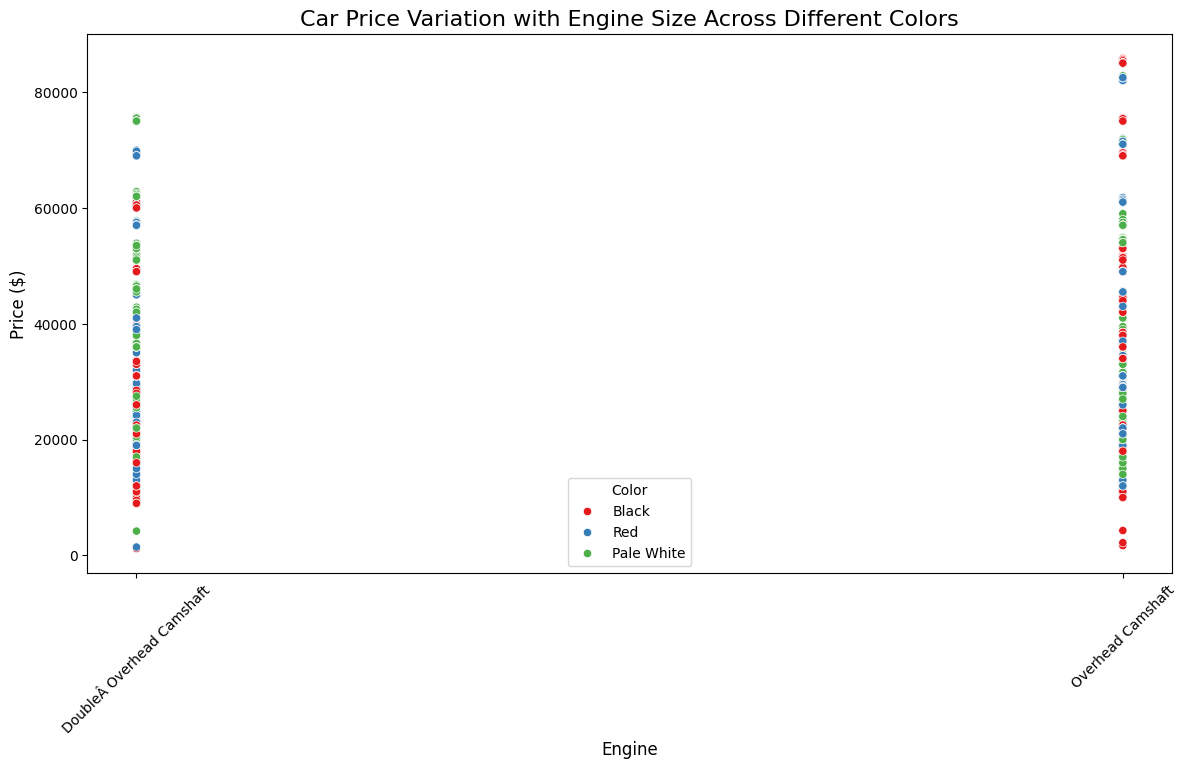

        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [26]:
#Question_No.11:How does car price vary with engine size across different car colors, and which colors have the highest price
#variation.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Engine', 'Color'])

# 1. Visualize car price variation with engine size across different car colors using a scatterplot
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df, palette='Set1')

# Adding title and labels
plt.title('Car Price Variation with Engine Size Across Different Colors', fontsize=16)
plt.xlabel('Engine', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels if needed

# Show the plot
plt.show()

# 2. Calculate price variation by color (e.g., using standard deviation)
price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()

# Sort the colors by price variation to identify which colors have the highest variation
price_variation_by_color = price_variation_by_color.sort_values(by='Price ($)', ascending=False)

# Print the top colors with highest price variation
print(price_variation_by_color)

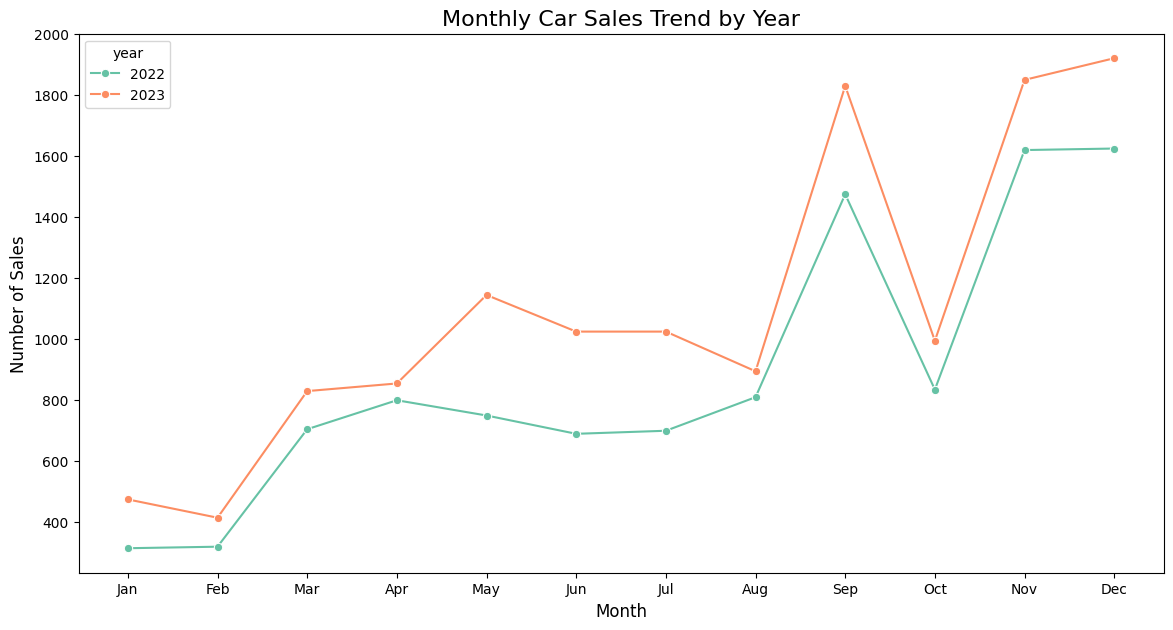

In [27]:
#Question_No.12: Is there any seasonal trend in car sales based on the date of sale.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert the 'sale_date' column to datetime format (assuming 'sale_date' is the column for the sale date)
df['sale_date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing values and drop rows with missing 'sale_date'
df = df.dropna(subset=['sale_date'])

# Extract 'Month' and 'Year' from the sale date
df['month'] = df['sale_date'].dt.month
df['year'] = df['sale_date'].dt.year

# 1. Group by month and year to count the number of sales
monthly_sales = df.groupby(['year', 'month']).size().reset_index(name='sales_count')

# 2. Visualize the seasonal trend using a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='sales_count', hue='year', data=monthly_sales, marker='o', palette='Set2')

# Adding title and labels
plt.title('Monthly Car Sales Trend by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()

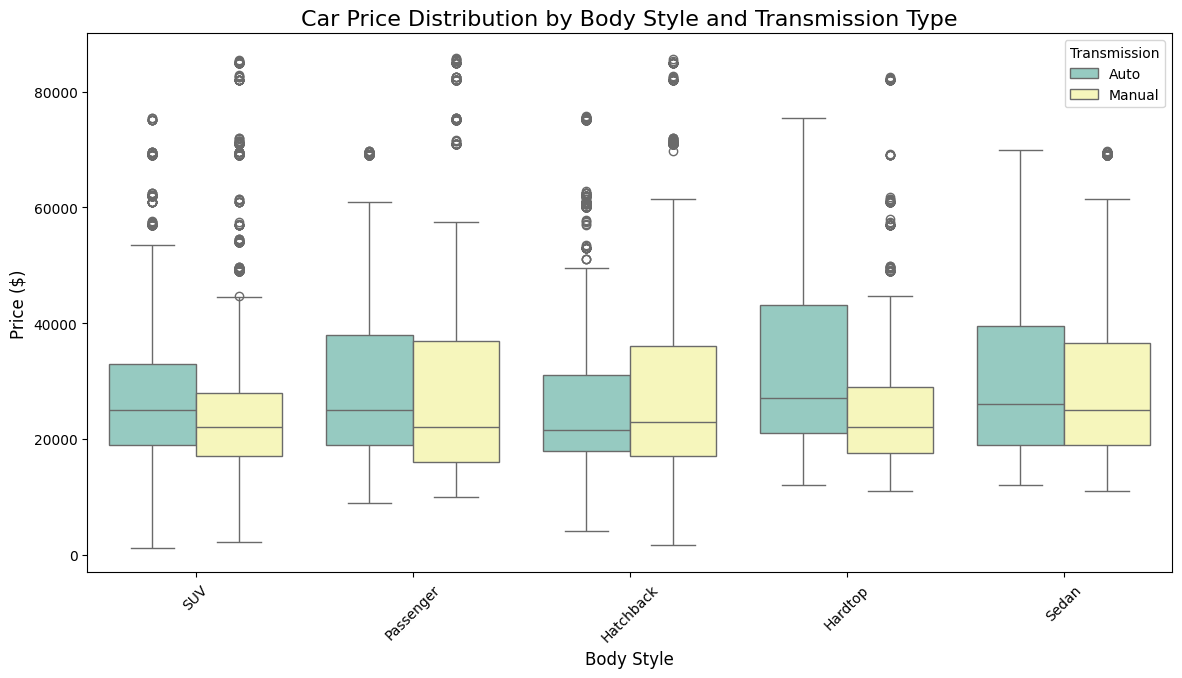

In [28]:
#Question_No.13: How does the car price distribution change when considering different combinations of body style and
#transmission type.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Body Style', 'Transmission'])

# 1. Visualize the car price distribution based on body style and transmission type using a boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set3')

# Adding title and labels
plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show the plot
plt.show()

Unique values in Engine column: ['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
   Engine  Annual Income  Price ($)
0     NaN          13500      26000
1     NaN        1480000      19000
2     NaN        1035000      31500
3     NaN          13500      14000
4     NaN        1465000      24500
Empty DataFrame
Columns: [Engine, Annual Income, Price ($)]
Index: []
Correlation Matrix:
               Price ($)  Engine  Annual Income
Price ($)            NaN     NaN            NaN
Engine               NaN     NaN            NaN
Annual Income        NaN     NaN            NaN


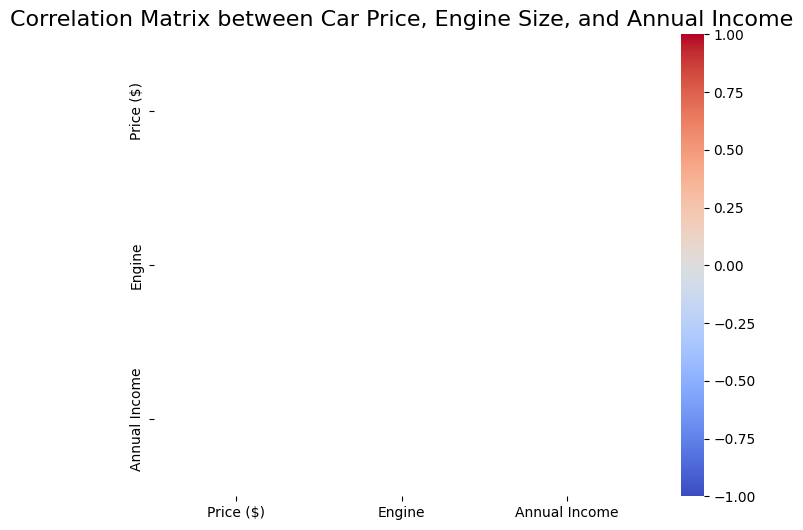

In [48]:
#Question_No.14:What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact.

#Answer:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check the unique values in the 'Engine' column to identify non-numeric entries
print("Unique values in Engine column:", df['Engine'].unique())

# Convert 'Engine' column to numeric, coercing errors to NaN (invalid data will be converted to NaN)
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

# Similarly, convert other columns like 'Annual Income' and 'Price ($)' to numeric as well
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Check the first few rows after conversion to ensure there are no non-numeric values in 'Engine', 'Annual Income', or 'Price ($)'
print(df[['Engine', 'Annual Income', 'Price ($)']].head())

# Drop rows with NaN values in the relevant columns ('Engine', 'Annual Income', 'Price ($)')
df_clean = df.dropna(subset=['Price ($)', 'Engine', 'Annual Income'])

# Check the cleaned data
print(df_clean[['Engine', 'Annual Income', 'Price ($)']].head())

# 1. Calculate the correlation between car price, engine size, and annual income
correlation_matrix = df_clean[['Price ($)', 'Engine', 'Annual Income']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

# Adding title
plt.title('Correlation Matrix between Car Price, Engine Size, and Annual Income', fontsize=16)
plt.show()

    Model                     Engine     Price ($)
0   3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1  3000GT  DoubleÂ Overhead Camshaft  22764.326923
2  3000GT          Overhead Camshaft  21770.659864
3    300M  DoubleÂ Overhead Camshaft  21394.888889
4    323i  DoubleÂ Overhead Camshaft  16744.632287


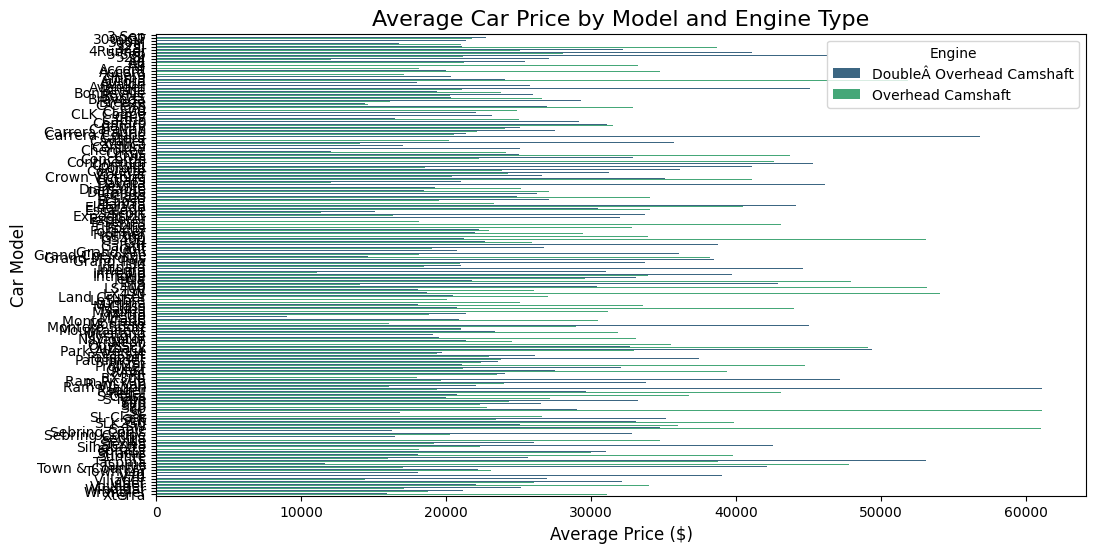

In [49]:
#Question_No.15: How does the average car price vary across different car models and engine types?

#Answer:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'car_sale.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert 'Price ($)' to numeric, coercing errors to NaN
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Check for missing values and drop rows where 'Price ($)' is NaN
df_clean = df.dropna(subset=['Price ($)', 'Model', 'Engine'])

# Group by car model and engine type, then calculate the average price for each group
average_price_by_model_engine = df_clean.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Print the first few rows of the result
print(average_price_by_model_engine.head())

# Visualize the average price across different car models and engine types
plt.figure(figsize=(12, 6))
sns.barplot(x='Price ($)', y='Model', hue='Engine', data=average_price_by_model_engine, palette='viridis')

# Add labels and title to the plot
plt.title('Average Car Price by Model and Engine Type', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.show()